### Pre-processing

##### Pre-processing is the concept of standardizing your model development dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load the file
df = pd.read_csv('EDA_Customer_Churn.csv')

In [3]:
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,Churn_Category,last_visit_hour
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,1.0,16
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Unknown,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,0.00,Yes,No,Yes,Solved,Quality Customer Care,1.0,12
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1.0,22
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,567.66,No,Yes,Yes,Unsolved,Poor Website,1.0,15
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,663.06,No,Yes,Yes,Solved,Poor Website,1.0,15


In [4]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  object        
 2   security_no                   36992 non-null  object        
 3   region_category               36992 non-null  object        
 4   membership_category           36992 non-null  object        
 5   joining_date                  36992 non-null  datetime64[ns]
 6   joined_through_referral       36992 non-null  object        
 7   referral_id                   36992 non-null  object        
 8   preferred_offer_types         36992 non-null  object        
 9   medium_of_operation           36992 non-null  object        
 10  internet_option               36992 non-null  object        
 11  days_since_last_login       

In [6]:
df['referral_id'].value_counts() 

xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID15792        9
            ...  
CID28755        1
CID62237        1
CID23663        1
CID23071        1
CID45477        1
Name: referral_id, Length: 11359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
df['referral_id_enc'] = LabelEncoder().fit_transform(df['referral_id'])
df.head(10)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,days_since_last_login,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,Churn_Category,last_visit_hour,referral_id_enc
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Unknown,...,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,1.0,16,11358
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Unknown,CID21329,Gift Vouchers/Coupons,Desktop,...,16,0.00,Yes,No,Yes,Solved,Quality Customer Care,1.0,12,2225
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,14,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1.0,22,471
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,11,567.66,No,Yes,Yes,Unsolved,Poor Website,1.0,15,5506
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,20,663.06,No,Yes,Yes,Solved,Poor Website,1.0,15,11358
5,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,Unknown,...,23,722.27,Yes,No,Yes,Unsolved,No reason specified,1.0,6,11358
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,...,10,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,1.0,11,2903
7,42,M,4UJ1551,Unknown,No Membership,2016-07-12,Unknown,CID56614,Credit/Debit Card Offers,Both,...,19,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1.0,7,9165
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,...,15,0.00,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,1.0,6,11358
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,Unknown,...,10,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1.0,19,11358


In [8]:
#one hot encode these columns
categorical_columns = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
                       'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint',
                       'complaint_status', 'feedback']
dummy_df = pd.get_dummies(df,columns= categorical_columns)


In [9]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 56 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   age                                             36992 non-null  int64         
 1   security_no                                     36992 non-null  object        
 2   joining_date                                    36992 non-null  datetime64[ns]
 3   referral_id                                     36992 non-null  object        
 4   days_since_last_login                           36992 non-null  int64         
 5   points_in_wallet                                36992 non-null  float64       
 6   Churn_Category                                  36992 non-null  float64       
 7   last_visit_hour                                 36992 non-null  int64         
 8   referral_id_enc                               

In [10]:
#standardization performed to binary encode categorical variables 

#### Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Features
X = dummy_df.loc[:, ~dummy_df.columns.isin(['Churn_Category', 'days_since_last_login', 'security_no','referral_id','joining_date'])]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             36992 non-null  int64  
 1   points_in_wallet                                36992 non-null  float64
 2   last_visit_hour                                 36992 non-null  int64  
 3   referral_id_enc                                 36992 non-null  int64  
 4   gender_F                                        36992 non-null  uint8  
 5   gender_M                                        36992 non-null  uint8  
 6   gender_Unknown                                  36992 non-null  uint8  
 7   region_category_City                            36992 non-null  uint8  
 8   region_category_Town                            36992 non-null  uint8  
 9   region_category_Unknown                

In [14]:
#Target
y = dummy_df['Churn_Category']

In [15]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36992 entries, 0 to 36991
Series name: Churn_Category
Non-Null Count  Dtype  
--------------  -----  
36992 non-null  float64
dtypes: float64(1)
memory usage: 289.1 KB


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

### Modeling 

In [17]:
#Logistic Regression 
#Bayes
#Decision Tree
#RandomForestClassifier
#SVM (This needs standardization?)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [18]:
#NO pipeline (Do it manually) 

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_test))) 


Accuracy of logistic regression classifier on test set: 0.95


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics

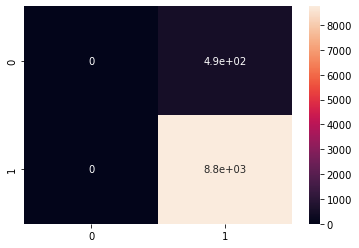

In [21]:
cm_lg = metrics.confusion_matrix(y_test, y_pred)
cm_plot = sns.heatmap(cm_lg, annot=True)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       494
         1.0       0.95      1.00      0.97      8754

    accuracy                           0.95      9248
   macro avg       0.47      0.50      0.49      9248
weighted avg       0.90      0.95      0.92      9248



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#GaussianNB (Naive Bayes)
nb = GaussianNB()
nb.fit(X_train,y_train)
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.946583044982699


In [23]:
#DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
print("Decision Tree score: ",DTC.score(X_test, y_test))

Decision Tree score:  0.8771626297577855


In [32]:
#RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1000, max_depth=10,class_weight="balanced")
RF.fit(X_train,y_train)
y_rf_pred = RF.predict(X_test)
print("Random Forest Classifier accuracy score: ",RF.score(X_test, y_test))

Random Forest Classifier accuracy score:  0.9449610726643599


In [33]:
pd.DataFrame(y_rf_pred).value_counts()

1.0    9231
0.0      17
dtype: int64

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

         0.0       0.06      0.00      0.00       494
         1.0       0.95      1.00      0.97      8754

    accuracy                           0.94      9248
   macro avg       0.50      0.50      0.49      9248
weighted avg       0.90      0.94      0.92      9248



In [36]:
#SVC
SV = SVC()
SV.fit(X_train,y_train)
y_SVC_pred = SVC.predict(X_test)
print("Support Vector Classifier accuracy score: ",SV.score(X_test, y_test))

TypeError: predict() missing 1 required positional argument: 'X'